# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [13]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/javieraramayo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Read your api key environment variable
load_dotenv("/Users/javieraramayo/API/APIkeys env.")
api_key = os.getenv("NEWS_API_KEY")

In [15]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [16]:
##### Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

7802

In [17]:
# Fetch the Ethereum news articles
ether_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ether_news_en["totalResults"]

4945

In [18]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")

# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Crypto News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_en_df = bitcoin_en_df.join(title_sentiment_df).join(text_sentiment_df)

bitcoin_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,The Rise and Fall of a Bitcoin Mining Sensation,Compass Mining grew quickly during crypto’s ha...,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,en,0.0000,0.000,1.000,0.000,0,0.5574,0.119,0.881,0.000,1
1,Bitcoin Fog Case Could Put Cryptocurrency Trac...,"Roman Sterlingov, accused of laundering $336 m...","Tools to trace cryptocurrencies have, over jus...",2022-08-02,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,Bitcoin Dumpster Guy Has a Wild Plan to Rescue...,You gotta hand it to some people for being imp...,You gotta hand it to some people for being imp...,2022-07-25,en,0.4019,0.208,0.692,0.101,1,0.5994,0.130,0.835,0.034,1
3,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,en,0.0000,0.000,1.000,0.000,0,-0.5584,0.068,0.763,0.170,-1
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...,Elon Musk-owned electric vehicle making compan...,2022-07-21,en,-0.2960,0.000,0.872,0.128,-1,0.2023,0.053,0.947,0.000,1


In [19]:
# Create the Ethereum sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)



ethereum_en_df = create_df(ether_news_en["articles"], "en")

# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}


# Get sentiment for the text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Crypto News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_en_df = ethereum_en_df.join(title_sentiment_df).join(text_sentiment_df)

ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,en,0.0000,0.000,1.000,0.000,0,-0.5584,0.068,0.763,0.170,-1
1,Instagram is expanding NFT features to more th...,The non-fungible token\r\n (NFT) market has fa...,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,en,0.0000,0.000,1.000,0.000,0,-0.0217,0.048,0.901,0.051,0
2,SEC charges 11 people over 'textbook' $300 mil...,"It's a day of the week ending in the letter ""y...","It's a day of the week ending in the letter ""y...",2022-08-02,en,-0.2732,0.000,0.826,0.174,-1,-0.2732,0.059,0.827,0.115,-1
3,GameStop is letting someone sell an NFT that r...,"Less than two weeks into its soft launch, Game...","Less than two weeks into its soft launch, Game...",2022-07-23,en,0.0000,0.000,1.000,0.000,0,-0.1531,0.000,0.955,0.045,-1
4,Ethereum Merge Explained: Why It Matters For E...,Ethereum will soon adopt a proof-of-stake syst...,"The Ethereum Merge is significant, and not jus...",2022-07-25,en,0.0258,0.121,0.879,0.000,0,0.2023,0.048,0.952,0.000,1


In [20]:
# Describe the Bitcoin Sentiment
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,-0.068203,0.06818,0.828270,0.103570,-0.120000,0.047574,0.065810,0.88110,0.053070,0.110000
std,0.378599,0.09688,0.150602,0.138254,0.794933,0.455208,0.071569,0.09011,0.072859,0.897753
min,-0.897900,0.00000,0.388000,0.000000,-1.000000,-0.908100,0.000000,0.62800,0.000000,-1.000000
25%,-0.366350,0.00000,0.730250,0.000000,-1.000000,-0.301550,0.000000,0.82525,0.000000,-1.000000
50%,0.000000,0.00000,0.826000,0.000000,0.000000,0.000000,0.056000,0.88500,0.000000,0.000000
75%,0.064375,0.13875,1.000000,0.206500,1.000000,0.362050,0.110500,0.94900,0.102250,1.000000
max,0.784500,0.39700,1.000000,0.500000,1.000000,0.924600,0.372000,1.00000,0.307000,1.000000


In [21]:
# Describe the Ethereum Sentiment
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.014112,0.066290,0.860370,0.073350,-0.020000,0.137046,0.073060,0.884380,0.042580,0.270000
std,0.331228,0.110981,0.153654,0.123991,0.738275,0.451054,0.071557,0.086195,0.067228,0.839131
min,-0.801600,0.000000,0.522000,0.000000,-1.000000,-0.936600,0.000000,0.646000,0.000000,-1.000000
25%,-0.183700,0.000000,0.757500,0.000000,-1.000000,-0.038650,0.000000,0.823500,0.000000,-0.250000
50%,0.000000,0.000000,0.883000,0.000000,0.000000,0.140550,0.061000,0.893500,0.000000,1.000000
75%,0.070525,0.118750,1.000000,0.150500,1.000000,0.510600,0.118250,0.943750,0.057000,1.000000
max,0.743000,0.406000,1.000000,0.462000,1.000000,0.921600,0.299000,1.000000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score for the text; however, bitcoin had the highest mean positive score fro the title

Q: Which coin had the highest compound score?

A: Bitcoin had the highest max compound score for both, the title and the text

Q. Which coin had the highest positive score?

A: Ethereum had the highest max positive score for both, the title and the text

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [23]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [24]:
# Complete the tokenizer function
def tokenizer(doc):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)  
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    return tokens

bitcoin_tokens = bitcoin_en_df["text"].apply(tokenizer)

In [25]:
## understanding regex
#regex = re.compile("[^a-zA-Z ]")
#word_tokenize(regex.sub('',str(bitcoin_en_df["text"])))
##bytes(bitcoin_en_df["text"][0],"utf-8")
##bitcoin_en_df["text"]
##re_clean = regex.sub('', doc)

In [26]:
#viewing bitcoin_tokens
bitcoin_tokens

0     [wa, morning, june, bill, stewart, ceo, maineb...
1     [tools, trace, cryptocurrencies, last, several...
2     [got, ta, hand, people, impetuous, even, face,...
3     [cryptocurrencies, often, criticized, bad, pla...
4     [elon, muskowned, electric, vehicle, making, c...
                            ...                        
95    [aug, reuters, us, judge, tuesday, granted, re...
96    [elon, musks, diamond, hand, turned, paper, te...
97    [deck, dated, july, reveals, babel, finance, l...
98    [drop, national, tv, marketing, industry, us, ...
99    [hi, jordan, parker, erb, insider, caught, fin...
Name: text, Length: 100, dtype: object

In [27]:
# Create a new tokens column for Bitcoin
bitcoin_en_df["bitcoin_tokens"] = bitcoin_tokens
bitcoin_en_df

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,bitcoin_tokens
0,The Rise and Fall of a Bitcoin Mining Sensation,Compass Mining grew quickly during crypto’s ha...,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,en,0.0000,0.000,1.000,0.000,0,0.5574,0.119,0.881,0.000,1,"[wa, morning, june, bill, stewart, ceo, maineb..."
1,Bitcoin Fog Case Could Put Cryptocurrency Trac...,"Roman Sterlingov, accused of laundering $336 m...","Tools to trace cryptocurrencies have, over jus...",2022-08-02,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[tools, trace, cryptocurrencies, last, several..."
2,Bitcoin Dumpster Guy Has a Wild Plan to Rescue...,You gotta hand it to some people for being imp...,You gotta hand it to some people for being imp...,2022-07-25,en,0.4019,0.208,0.692,0.101,1,0.5994,0.130,0.835,0.034,1,"[got, ta, hand, people, impetuous, even, face,..."
3,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,en,0.0000,0.000,1.000,0.000,0,-0.5584,0.068,0.763,0.170,-1,"[cryptocurrencies, often, criticized, bad, pla..."
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...,Elon Musk-owned electric vehicle making compan...,2022-07-21,en,-0.2960,0.000,0.872,0.128,-1,0.2023,0.053,0.947,0.000,1,"[elon, muskowned, electric, vehicle, making, c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fraud charges in hacking case against Uber ex-...,A U.S. judge on Tuesday granted a request by p...,Aug 2 (Reuters) - A U.S. judge on Tuesday gran...,2022-08-02,en,-0.7096,0.000,0.629,0.371,-1,-0.2960,0.122,0.722,0.156,-1,"[aug, reuters, us, judge, tuesday, granted, re..."
96,Elon 'Diamond Hands' Musk Sells 75% of Tesla's...,"Tesla may still have ""diamond hands,"" as Musk ...",Elon Musk's diamond hands have turned to paper...,2022-07-21,en,0.3400,0.167,0.833,0.000,1,0.3400,0.064,0.936,0.000,1,"[elon, musks, diamond, hand, turned, paper, te..."
97,Babel Finance Lost Over $280 Million in Propri...,"Babel Finance, the troubled Asian crypto lende...","The deck, dated July 2022, reveals that Babel ...",2022-07-29,en,-0.3182,0.000,0.827,0.173,-1,-0.7845,0.000,0.807,0.193,-1,"[deck, dated, july, reveals, babel, finance, l..."
98,"Crypto Ads Starring Matt Damon, Tom Brady Vani...",Matt Damon's pitch to invest in crypto has dis...,The drop in national TV marketing by the indus...,2022-08-17,en,0.0000,0.000,1.000,0.000,0,-0.1027,0.045,0.899,0.056,-1,"[drop, national, tv, marketing, industry, us, ..."


In [28]:
# Create a new tokens column for Ethereum
ethereum_tokens = ethereum_en_df["text"].apply(tokenizer)
ethereum_en_df["ethereum_tokens"] = ethereum_tokens
ethereum_en_df

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,ethereum_tokens
0,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,en,0.0000,0.000,1.000,0.000,0,-0.5584,0.068,0.763,0.170,-1,"[cryptocurrencies, often, criticized, bad, pla..."
1,Instagram is expanding NFT features to more th...,The non-fungible token\r\n (NFT) market has fa...,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,en,0.0000,0.000,1.000,0.000,0,-0.0217,0.048,0.901,0.051,0,"[nonfungible, token, nft, market, ha, fallen, ..."
2,SEC charges 11 people over 'textbook' $300 mil...,"It's a day of the week ending in the letter ""y...","It's a day of the week ending in the letter ""y...",2022-08-02,en,-0.2732,0.000,0.826,0.174,-1,-0.2732,0.059,0.827,0.115,-1,"[day, week, ending, letter, inevitably, mean, ..."
3,GameStop is letting someone sell an NFT that r...,"Less than two weeks into its soft launch, Game...","Less than two weeks into its soft launch, Game...",2022-07-23,en,0.0000,0.000,1.000,0.000,0,-0.1531,0.000,0.955,0.045,-1,"[less, two, week, soft, launch, gamestops, nft..."
4,Ethereum Merge Explained: Why It Matters For E...,Ethereum will soon adopt a proof-of-stake syst...,"The Ethereum Merge is significant, and not jus...",2022-07-25,en,0.0258,0.121,0.879,0.000,0,0.2023,0.048,0.952,0.000,1,"[ethereum, merge, significant, people, crypto,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The endless search for a crypto use case,Are we there yet?,Today I read a Nat Eliason post titled Does Cr...,2022-08-02,en,0.0000,0.000,1.000,0.000,0,0.3975,0.076,0.892,0.032,1,"[today, read, nat, eliason, post, titled, cryp..."
96,"Ethereum Classic Soars Over 70% This Week, and...","Unlike Ethereum Classic, Bitcoin Gold might no...",What happened\r\nCryptocurrency Ethereum Class...,2022-07-22,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[happenedcryptocurrencyethereum, classicetc, w..."
97,2 Cryptos That Could Lead the Market Recovery,Bitcoin and Ethereum are uniquely positioned t...,The downturn in the crypto market might end up...,2022-08-17,en,0.0000,0.000,1.000,0.000,0,0.3182,0.091,0.853,0.056,1,"[downturn, crypto, market, might, end, lasting..."
98,Why the Ethereum Merge Is Prompting More Incre...,The upcoming Ethereum merge could be a bigger ...,What happened\r\nIn the latest bullish turn in...,2022-07-28,en,0.0000,0.000,1.000,0.000,0,-0.1032,0.064,0.861,0.075,-1,"[happenedin, latest, bullish, turn, crypto, ma..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
n = 2

bitcoin_counts = Counter(ngrams(tokenizer(str(bitcoin_en_df["text"])), n))
bitcoin_counts


Counter({('wa', 'morning'): 1,
         ('morning', 'june'): 1,
         ('june', 'bil'): 1,
         ('bil', 'tools'): 1,
         ('tools', 'trace'): 1,
         ('trace', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'jus'): 1,
         ('jus', 'got'): 1,
         ('got', 'ta'): 1,
         ('ta', 'hand'): 1,
         ('hand', 'people'): 1,
         ('people', 'imp'): 1,
         ('imp', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'often'): 1,
         ('often', 'criticized'): 1,
         ('criticized', 'bein'): 1,
         ('bein', 'elon'): 1,
         ('elon', 'muskowned'): 1,
         ('muskowned', 'electric'): 1,
         ('electric', 'vehicle'): 1,
         ('vehicle', 'making'): 1,
         ('making', 'compan'): 1,
         ('compan', 'aug'): 1,
         ('aug', 'reuters'): 1,
         ('reuters', 'us'): 1,
         ('us', 'judge'): 1,
         ('judge', 'tuesday'): 1,
         ('tuesday', 'gran'): 1,
         ('gran', 'elon'): 1,
         ('elon', 'musks'): 

In [31]:
# Generate the Ethereum N-grams where N=2
ethereum_counts = Counter(ngrams(tokenizer(str(ethereum_en_df["text"])), n))
ethereum_counts

Counter({('cryptocurrencies', 'often'): 1,
         ('often', 'criticized'): 1,
         ('criticized', 'bein'): 1,
         ('bein', 'nonfungible'): 1,
         ('nonfungible', 'tokenrn'): 1,
         ('tokenrn', 'nft'): 1,
         ('nft', 'market'): 1,
         ('market', 'ha'): 1,
         ('ha', 'fa'): 1,
         ('fa', 'day'): 1,
         ('day', 'week'): 1,
         ('week', 'ending'): 1,
         ('ending', 'letter'): 1,
         ('letter', 'less'): 1,
         ('less', 'two'): 1,
         ('two', 'week'): 1,
         ('week', 'soft'): 1,
         ('soft', 'launch'): 1,
         ('launch', 'game'): 1,
         ('game', 'ethereum'): 1,
         ('ethereum', 'merge'): 1,
         ('merge', 'significant'): 1,
         ('significant', 'jus'): 1,
         ('jus', 'today'): 1,
         ('today', 'read'): 1,
         ('read', 'nat'): 1,
         ('nat', 'eliason'): 1,
         ('eliason', 'post'): 1,
         ('post', 'titled'): 1,
         ('titled', 'cr'): 1,
         ('cr', 'happe

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(Counter(ngrams(tokenizer(str(bitcoin_en_df["text"])), n=10)))

#dict(bitcoin_counts)
print(dict(bitcoin_top10))


{('wa', 'morning', 'june', 'bil', 'tools', 'trace', 'cryptocurrencies', 'jus', 'got', 'ta'): 1, ('morning', 'june', 'bil', 'tools', 'trace', 'cryptocurrencies', 'jus', 'got', 'ta', 'hand'): 1, ('june', 'bil', 'tools', 'trace', 'cryptocurrencies', 'jus', 'got', 'ta', 'hand', 'people'): 1}


In [34]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(Counter(ngrams(tokenizer(str(ethereum_en_df["text"])), n=10)))

#dict(bitcoin_counts)
print(dict(ethereum_top10))

{('cryptocurrencies', 'often', 'criticized', 'bein', 'nonfungible', 'tokenrn', 'nft', 'market', 'ha', 'fa'): 1, ('often', 'criticized', 'bein', 'nonfungible', 'tokenrn', 'nft', 'market', 'ha', 'fa', 'day'): 1, ('criticized', 'bein', 'nonfungible', 'tokenrn', 'nft', 'market', 'ha', 'fa', 'day', 'week'): 1}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

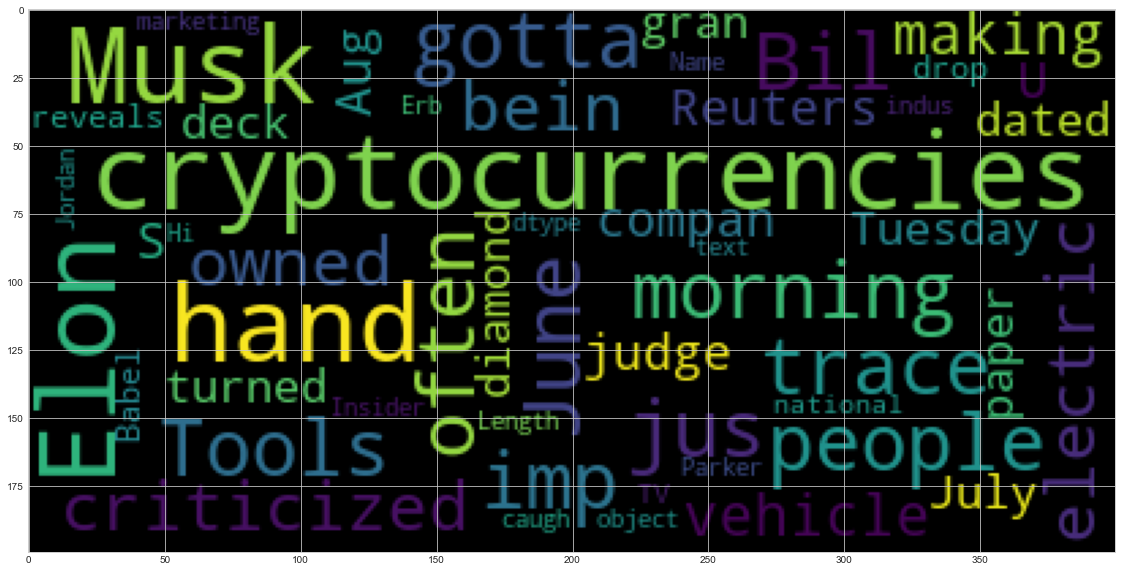

In [36]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(str(bitcoin_en_df["text"]))
plt.imshow(wc)

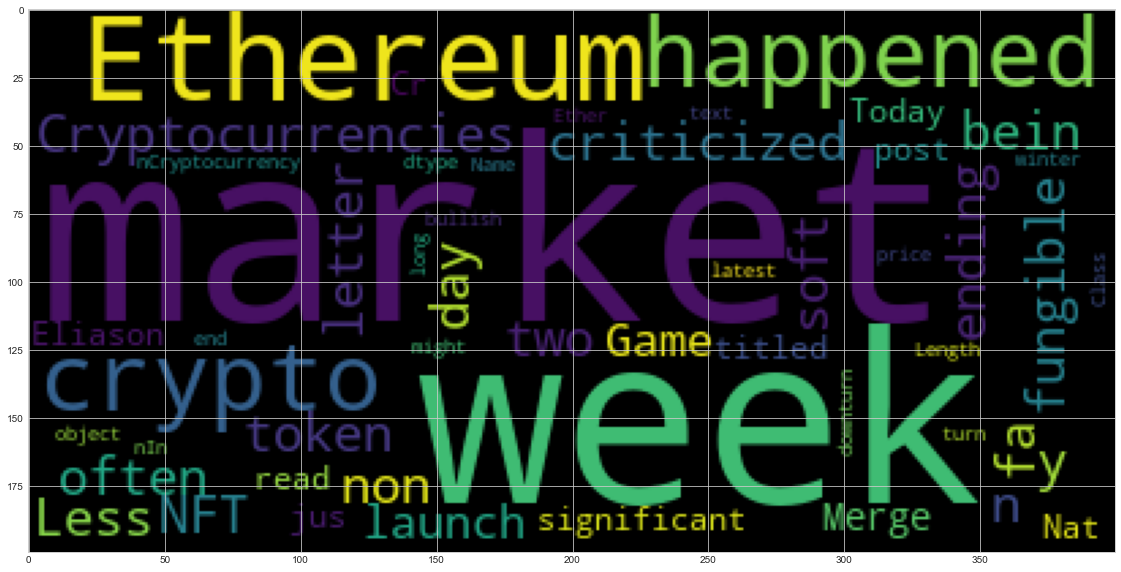

In [37]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(str(ethereum_en_df["text"]))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy

# !python -m spacy download en_core_web_sm



In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [47]:
# Concatenate all of the Bitcoin text together
bit_one_text = bitcoin_en_df.text.str.cat()
bit_one_text


#bitcoin_en_df["text"] = bitcoin_en_df.groupby(["text"])["text"].transform(lambda x : ' '.join(x))
#bitcoin_en_df["text"].head
#print(bitcoin_en_df)
# YOUR CODE HERE!

'It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He\'s like, Every machine inside of … [+3472 chars]Tools to trace cryptocurrencies have, over just the last several years, allowed law enforcement agencies to convict dark web black market administrators, recover millions in ransomware payments, seiz… [+3510 chars]You gotta hand it to some people for being impetuous even in the face of extraordinary odds. Imagine looking for a single hard drive amidst a literal heap of trash. Well, thats been one UK mans goal … [+4091 chars]Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]Elon Musk-owned electric vehicle making company Tesla has sold a significant amount of its Bitcoin holdings, the firm said in a statement. Rep

In [48]:
# Run the NER processor on all of the text
document = nlp(bit_one_text)

# Add a title to the document
document.user_data["title"] = "Bitcoin NER"

In [49]:
# Render the visualization
displacy.render(document, style='ent')

In [50]:
# List all Entities
entities = [ent.text for ent in document.ents]
print(entities)

['8:45 in the morning', 'June 13', 'Bill Stewart', 'Maine', 'Dynamics Mining', '+3472', 'the last several years', 'millions', 'one', 'UK', 'mans', 'Every year', 'Belgium', 'the University of Cambridges Bitcoin Electricity Consump', 'Tesla', 'Bitcoin', 'Q2', 'Reuters', '6.85%', '22,717.05', '22:05 GMT', 'Wednesday', '1,457.27', '29.1%', 'weeks', '+17', '2021', 'Tesla', '$936 million', 'the second quarter of 2022', 'Bitcoin', '75', '24,000', 'first', 'August', 'US', 'this week', 'as much as 4%', '24,191', '19', 'Reuters', 'Friday', 'three-week', '2', 'Reuters', 'a good month', 'months', 'more than 17%', 'July', 'October', 'Reuters', '3.36%', '24,584.24', '1707', 'GMT', 'Saturday', '798.93', '39.7%', 'the year', '2022', 'Q2 earnings', 'Wednesday', 'Elon Musks', '$2.3 billion', 'second-quarter', 'a record $3.3 billion', 'first', '11', 'Reuters', 'BlackRock Inc', 'the United States', 'Reuters', 'months', 'Bitcoin', 'YORK', 'July 20', 'Reuters', 'Wednesday', 'Tesla Inc', 'about 75%', 'ten', 

---

### Ethereum NER

In [51]:
# Concatenate all of the Ethereum text together
ether_one_text = bitcoin_en_df.text.str.cat()
ether_one_text

'It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He\'s like, Every machine inside of … [+3472 chars]Tools to trace cryptocurrencies have, over just the last several years, allowed law enforcement agencies to convict dark web black market administrators, recover millions in ransomware payments, seiz… [+3510 chars]You gotta hand it to some people for being impetuous even in the face of extraordinary odds. Imagine looking for a single hard drive amidst a literal heap of trash. Well, thats been one UK mans goal … [+4091 chars]Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]Elon Musk-owned electric vehicle making company Tesla has sold a significant amount of its Bitcoin holdings, the firm said in a statement. Rep

In [52]:
# Run the NER processor on all of the text
document = nlp(ether_one_text)

# Add a title to the document
document.user_data["title"] = "Ethereum NER"

In [53]:
# Render the visualization
displacy.render(document, style='ent')

In [54]:
# List all Entities
entities = [ent.text for ent in document.ents]
print(entities)

['8:45 in the morning', 'June 13', 'Bill Stewart', 'Maine', 'Dynamics Mining', '+3472', 'the last several years', 'millions', 'one', 'UK', 'mans', 'Every year', 'Belgium', 'the University of Cambridges Bitcoin Electricity Consump', 'Tesla', 'Bitcoin', 'Q2', 'Reuters', '6.85%', '22,717.05', '22:05 GMT', 'Wednesday', '1,457.27', '29.1%', 'weeks', '+17', '2021', 'Tesla', '$936 million', 'the second quarter of 2022', 'Bitcoin', '75', '24,000', 'first', 'August', 'US', 'this week', 'as much as 4%', '24,191', '19', 'Reuters', 'Friday', 'three-week', '2', 'Reuters', 'a good month', 'months', 'more than 17%', 'July', 'October', 'Reuters', '3.36%', '24,584.24', '1707', 'GMT', 'Saturday', '798.93', '39.7%', 'the year', '2022', 'Q2 earnings', 'Wednesday', 'Elon Musks', '$2.3 billion', 'second-quarter', 'a record $3.3 billion', 'first', '11', 'Reuters', 'BlackRock Inc', 'the United States', 'Reuters', 'months', 'Bitcoin', 'YORK', 'July 20', 'Reuters', 'Wednesday', 'Tesla Inc', 'about 75%', 'ten', 

---